In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry.polygon import Polygon
from h3 import h3 
from shapely.geometry import shape
from shapely.geometry import Point

In [3]:
df=pd.read_csv('taxi_2017_complete_preprocessed.csv', parse_dates=['start_time','end_time'])
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df

,start_time,end_time,trip_seconds,trip_miles,start_census,end_census,start_community,end_community,fare,tips,...,Dropoff Centroid Location,new_TaxiID,dur_min,date,weekday,avg_temp,precip,hour,day,month
0,2017-05-12 21:00:00,2017-05-12 21:15:00,865.0,4.6,17031320100,17031070300,32,7,15.00,2.55,...,POINT (-87.6513108767 41.9290469366),2464,14.42,2017-05-12 00:00:00,4,21.1,0.0,21,12,5
1,2017-04-27 11:30:00,2017-04-27 11:30:00,20.0,0.0,17031210601,17031210601,21,21,3.25,0.65,...,POINT (-87.7112105933 41.93866619620001),4463,0.33,2017-04-27 00:00:00,3,14.4,1.0,11,27,4
2,2017-06-29 01:00:00,2017-06-29 01:15:00,1560.0,17.1,17031980000,17031081000,76,8,33.65,0.00,...,POINT (-87.6333080367 41.899602111),3884,26.00,2017-06-29 00:00:00,3,25.6,0.0,1,29,6
3,2017-04-27 21:00:00,2017-04-27 21:30:00,2082.0,18.2,17031560800,17031062200,56,6,45.75,7.46,...,POINT (-87.6559981815 41.9442266014),5718,34.70,2017-04-27 00:00:00,3,7.8,0.0,21,27,4
4,2017-05-03 14:15:00,2017-05-03 14:15:00,474.0,0.9,17031320100,17031081401,32,8,6.25,1.00,...,POINT (-87.6197106717 41.8950334495),5718,7.90,2017-05-03 00:00:00,2,9.4,0.0,14,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160231,2017-10-08 16:30:00,2017-10-08 17:45:00,4260.0,28.5,17031839000,17031980100,32,56,72.25,0.00,...,POINT (-87.7509342894 41.785998518),758,71.00,2017-10-08 00:00:00,6,20.6,0.0,16,8,10
5160232,2017-10-22 18:00:00,2017-10-22 18:15:00,540.0,0.0,17031320100,17031833000,32,28,7.25,1.65,...,POINT (-87.6572331997 41.8852813201),4246,9.00,2017-10-22 00:00:00,6,20.0,0.0,18,22,10
5160233,2017-10-23 11:15:00,2017-10-23 11:15:00,360.0,0.0,17031071100,17031062200,7,6,6.00,3.00,...,POINT (-87.6559981815 41.9442266014),2906,6.00,2017-10-23 00:00:00,0,10.6,1.0,11,23,10
5160234,2017-10-07 13:45:00,2017-10-07 14:00:00,900.0,3.1,17031081500,17031081800,8,8,12.25,2.65,...,POINT (-87.6378442095 41.8932163595),4986,15.00,2017-10-07 00:00:00,5,20.0,0.0,13,7,10


In [5]:
df.count()

start_time                   5160236
end_time                     5160236
trip_seconds                 5160236
trip_miles                   5160236
start_census                 5160236
end_census                   5160236
start_community              5160236
end_community                5160236
fare                         5160236
tips                         5160236
tolls                        5160236
extras                       5160236
Trip Total                   5160236
payment_type                 5160236
company                      5160236
start_latitude               5160236
start_longitude              5160236
Pickup Centroid Location     5160236
end_latitude                 5160236
end_longitude                5160236
Dropoff Centroid Location    5160236
new_TaxiID                   5160236
dur_min                      5160236
date                         5160236
weekday                      5160236
avg_temp                     5160236
precip                       5160236
h

## hier ist ein part mit H3, den ich noch nicht komplett verstehe warum wir das brauchen sollten wenn wir schon community area und census tracts haben

In [27]:
H3_HEXAGON_RESOLUTION = 8

In [28]:
df["h3_hex_id_start"] = df.apply(lambda row: h3.geo_to_h3(row["Pickup Centroid Latitude"], row["Pickup Centroid Longitude"], H3_HEXAGON_RESOLUTION) if (row['Pickup Centroid Latitude'] and row['Pickup Centroid Longitude']) else 0, axis=1)
# trips["h3_hex_id_end"] = trips.apply(lambda row: h3.geo_to_h3(row["latitude_start"], row["longitude_end"], H3_HEXAGON_RESOLUTION) if (row['latitude_end'] and row['longitude_end']) else 0, axis=1)

trips_starts = pd.DataFrame()
trips_starts = df.groupby('h3_hex_id_start').count()['dur_min'].reset_index().rename(columns={'dur_min': 'count'})
trips_starts['geometry'] = trips_starts.apply(lambda x: Polygon(h3.h3_to_geo_boundary(x["h3_hex_id_start"], geo_json=True)), axis=1)

trips_starts_geo = gpd.GeoDataFrame(trips_starts, geometry=trips_starts['geometry'], crs='EPSG:4326')

In [29]:
trips_starts

,h3_hex_id_start,count,geometry
0,8826641915fffff,27,POLYGON ((-87.54296487952223 41.66656964617557...
1,882664194bfffff,1,POLYGON ((-87.53235897403569 41.70084757190684...
2,8826641961fffff,307,POLYGON ((-87.57319298911698 41.69756072286854...
3,8826641b23fffff,35,POLYGON ((-87.53039023937232 41.71477318428209...
4,882664520bfffff,22987,POLYGON ((-87.76679108859273 41.79984486289543...
...,...,...,...
262,8827593699fffff,1502,POLYGON ((-87.80404417594646 41.99391889040945...
263,88275936b1fffff,40,POLYGON ((-87.84030498230973 41.98301332953332...
264,88275936b7fffff,1,POLYGON ((-87.84697425084084 41.97653768691125...
265,88275936bbfffff,1,POLYGON ((-87.82885003687991 41.98199202793128...


<AxesSubplot:>

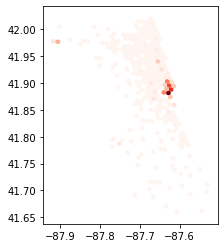

In [30]:
trips_starts_geo.plot(column='count', cmap='Reds')